### Deliverable 1: Preprocessing the Data for a Neural Network

In [505]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [506]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_clean = application_df.drop(['EIN','NAME'], axis=1)  # axis=1 means drop the columns
df_clean.head()
df_original = df_clean.copy()

In [507]:
# Determine the number of unique values in each column.
df_clean.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [508]:
# Look at APPLICATION_TYPE value counts for binning
df_clean['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:>

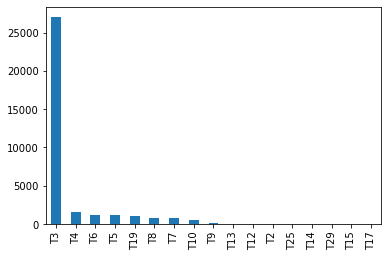

In [509]:
# Visualize the value counts of APPLICATION_TYPE
df_clean['APPLICATION_TYPE'].value_counts().plot(kind='bar')

In [510]:
# Determine which values to replace if counts are less than 10
replace_application_indicator = df_clean['APPLICATION_TYPE'].value_counts() < 50
# switch the index with values 
replaced_application = pd.Series(replace_application_indicator.index.values, index=replace_application_indicator )
# select only values that are less than 10 (aka true values)
replaced_application = replaced_application[replaced_application.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replaced_application:
    df_clean.APPLICATION_TYPE = df_clean.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df_clean.APPLICATION_TYPE.value_counts()
#print(application_df['APPLICATION_TYPE']!='Other')
#application_df.tail()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: APPLICATION_TYPE, dtype: int64

In [511]:
# Look at CLASSIFICATION value counts for binning
df_clean['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:>

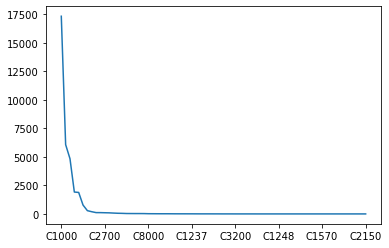

In [512]:
# Visualize the value counts of CLASSIFICATION
df_clean['CLASSIFICATION'].value_counts().plot(kind='line')

In [513]:
# Determine which values to replace if counts are less than 10
replace_class_indicator = df_clean['CLASSIFICATION'].value_counts() < 50
# switch the index with values 
replace_class = pd.Series(replace_class_indicator.index.values, index=replace_class_indicator )
# select only values that are less than 10 (aka true values)
replace_class = replace_class[replace_class.index.values == True]

# Replace in dataframe
for cls in replace_class:
    df_clean.CLASSIFICATION = df_clean.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
df_clean.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      391
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Name: CLASSIFICATION, dtype: int64

In [514]:
# Generate our categorical variable lists
application_cat = df_clean.select_dtypes(include=['object']).columns.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [515]:
df_clean[application_cat].nunique()

APPLICATION_TYPE          11
AFFILIATION                6
CLASSIFICATION            16
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [516]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_clean[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [517]:
# Merge one-hot encoded features and drop the originals
df_application = df_clean.merge(encode_df, left_index=True, right_index=True)
df_application.drop(application_cat, 1, inplace=True)
df_application.head()

<ipython-input-517-024d8c5d6c36>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_application.drop(application_cat, 1, inplace=True)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [518]:
# Split our preprocessed data into our features and target arrays
y = df_application["IS_SUCCESSFUL"].values
X = df_application.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.2)

In [519]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [520]:
X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 1st attempt to optimize: optimize the Model - Target Accuracy better than 72%

In [560]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled[0])
no_of_nodes_layer1 = int(no_of_features * 1.5)
no_of_nodes_layer2 = int(no_of_features * 1)
no_of_output_nodes = 1

### print all the layers input
print(no_of_features)
print(no_of_nodes_layer1)
print(no_of_nodes_layer2)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=no_of_nodes_layer1, activation='relu', input_dim=no_of_features))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=no_of_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=no_of_output_nodes, activation='sigmoid'))

# Check the structure of the model
nn.summary()

55
82
55
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 82)                4592      
                                                                 
 dense_89 (Dense)            (None, 55)                4565      
                                                                 
 dense_90 (Dense)            (None, 1)                 56        
                                                                 
Total params: 9,213
Trainable params: 9,213
Non-trainable params: 0
_________________________________________________________________


In [561]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("AlphabetSoupCharity_Optimization.h5", verbose=1, save_weights_only=True, save_freq=5)

In [562]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [563]:
# Train the model
model = nn.fit(X_train_scaled, y_train, epochs=100,verbose=1)

Epoch 1/100
858/858 [==============================] - 1s 938us/step - loss: 0.5737 - accuracy: 0.7165
Epoch 2/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5587 - accuracy: 0.7261
Epoch 3/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7277
Epoch 4/100
858/858 [==============================] - 1s 934us/step - loss: 0.5523 - accuracy: 0.7281
Epoch 5/100
858/858 [==============================] - 1s 907us/step - loss: 0.5514 - accuracy: 0.7282
Epoch 6/100
858/858 [==============================] - 1s 921us/step - loss: 0.5497 - accuracy: 0.7311
Epoch 7/100
858/858 [==============================] - 1s 918us/step - loss: 0.5483 - accuracy: 0.7303
Epoch 8/100
858/858 [==============================] - 1s 911us/step - loss: 0.5476 - accuracy: 0.7312
Epoch 9/100
858/858 [==============================] - 1s 934us/step - loss: 0.5470 - accuracy: 0.7322
Epoch 10/100
858/858 [==============================] - 1s 911us/step - loss:

In [564]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5423 - accuracy: 0.7405 - 193ms/epoch - 897us/step
Loss: 0.5422736406326294, Accuracy: 0.7405247688293457


##### 2nd attempt ####

In [526]:
# Generate our categorical variable lists
df_orig_iter2 = df_original.copy()
application_cat_iter2 = df_orig_iter2.columns.tolist()
application_cat_iter2

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'STATUS',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT',
 'IS_SUCCESSFUL']

In [527]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_orig_iter2[application_cat_iter2]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat_iter2)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,ASK_AMT_1893400128,ASK_AMT_2264109450,ASK_AMT_2310256039,ASK_AMT_3391919220,ASK_AMT_4653011914,ASK_AMT_5591584994,ASK_AMT_8556638692,ASK_AMT_8597806340,IS_SUCCESSFUL_0,IS_SUCCESSFUL_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [528]:
df_orig_iter2[application_cat_iter2].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [529]:
# Merge one-hot encoded features and drop the originals
df_application_iter2 = df_orig_iter2.merge(encode_df, left_index=True, right_index=True)
df_application_iter2.drop(application_cat_iter2, 1, inplace=True)
#df_application_iter1.head()
application_cat

<ipython-input-529-dab63d8ddcde>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_application_iter2.drop(application_cat_iter2, 1, inplace=True)


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [530]:
df_application_iter2.columns

Index(['APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T12', 'APPLICATION_TYPE_T13',
       'APPLICATION_TYPE_T14', 'APPLICATION_TYPE_T15', 'APPLICATION_TYPE_T17',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T2', 'APPLICATION_TYPE_T25',
       'APPLICATION_TYPE_T29',
       ...
       'ASK_AMT_1893400128', 'ASK_AMT_2264109450', 'ASK_AMT_2310256039',
       'ASK_AMT_3391919220', 'ASK_AMT_4653011914', 'ASK_AMT_5591584994',
       'ASK_AMT_8556638692', 'ASK_AMT_8597806340', 'IS_SUCCESSFUL_0',
       'IS_SUCCESSFUL_1'],
      dtype='object', length=8865)

In [531]:
# Split our preprocessed data into our features and target arrays
y2 = df_application_iter2["IS_SUCCESSFUL"].values
X2 = df_application_iter2.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, random_state=50, test_size=0.2)

KeyError: 'IS_SUCCESSFUL'

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_2 = scaler.fit(X_train_2)

# Scale the data
X_train_scaled_2 = X_scaler_2.transform(X_train_2)
X_test_scaled_2 = X_scaler_2.transform(X_test_2)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled_2[0])
no_of_nodes_layer1 = int(no_of_features * 0.70)
no_of_nodes_layer2 = int(no_of_features * 0.50)
no_of_output_nodes = 1

### print all the layers input
print(no_of_features)
print(no_of_nodes_layer1)
print(no_of_nodes_layer2)

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=no_of_nodes_layer1, activation='tanh', input_dim=no_of_features))


# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=no_of_nodes_layer2, activation='tanh'))


# Output layer
nn2.add(tf.keras.layers.Dense(units=no_of_output_nodes, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("AlphabetSoupCharity_Optimization.h5", verbose=1, save_weights_only=True, save_freq=5)

In [ ]:
# Compile the model
nn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model = nn2.fit(X_train_scaled_2, y_train_2, epochs=100,verbose=1)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled_2,y_test_2,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

####3rd attempt ####

### 3rd attempt to optimize: optimize the Model - Target Accuracy better than 74%

In [ ]:
#copy the dataframe
df_orig_iter3 = df_clean.copy()

# Determine which values to replace if counts are less than 10
replace_application_indicator_1 = ((df_orig_iter3['APPLICATION_TYPE'].value_counts() > 1000) & (df_orig_iter3['APPLICATION_TYPE'].value_counts() < 5000))
replaced_application_1 = pd.Series(replace_application_indicator_1.index.values, index=replace_application_indicator_1 )
# select only values that are less than 10 (aka true values)
replaced_application_1 = replaced_application_1[replaced_application_1.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replaced_application_1:
    df_orig_iter3.APPLICATION_TYPE = df_orig_iter3.APPLICATION_TYPE.replace(app,"Thousands-Group")


# Determine which values to replace if counts are less than 10
replace_application_indicator_2 = ((df_orig_iter3['APPLICATION_TYPE'].value_counts() > 500) & (df_orig_iter3['APPLICATION_TYPE'].value_counts() < 1000))
replaced_application_2 = pd.Series(replace_application_indicator_2.index.values, index=replace_application_indicator_2 )
# select only values that are less than 10 (aka true values)
replaced_application_2 = replaced_application_2[replaced_application_2.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replaced_application_2:
    df_orig_iter3.APPLICATION_TYPE = df_orig_iter3.APPLICATION_TYPE.replace(app,"5Hundreds-Group")
    
# Check to make sure binning was successful
df_orig_iter3.APPLICATION_TYPE.value_counts()

T3                 27037
Thousands-Group     4996
5Hundreds-Group     1990
T9                   156
T13                   66
Other                 54
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Determine which values to replace if counts are less than 10
replace_class_indicator_1 = ((df_orig_iter3['CLASSIFICATION'].value_counts() > 1000) & (df_orig_iter3['CLASSIFICATION'].value_counts() < 5000))
# switch the index with values 
replace_class_1 = pd.Series(replace_class_indicator_1.index.values, index=replace_class_indicator_1 )
# select only values that are less than 10 (aka true values)
replace_class_1 = replace_class_1[replace_class_1.index.values == True]

# Replace in dataframe
for cls in replace_class_1:
    df_orig_iter3.CLASSIFICATION = df_orig_iter3.CLASSIFICATION.replace(cls,"Thousands-Group")
    
# Determine which values to replace if counts are less than 10
replace_class_indicator_2 = ((df_orig_iter3['CLASSIFICATION'].value_counts() > 10) & (df_orig_iter3['CLASSIFICATION'].value_counts() < 100))
# switch the index with values 
replace_class_2 = pd.Series(replace_class_indicator_2.index.values, index=replace_class_indicator_2 )
# select only values that are less than 10 (aka true values)
replace_class_2 = replace_class_2[replace_class_2.index.values == True]

# Replace in dataframe
for cls in replace_class_2:
    df_orig_iter3.CLASSIFICATION = df_orig_iter3.CLASSIFICATION.replace(cls,"Hundred-Group")

# Determine which values to replace if counts are less than 10
replace_class_indicator_3 = ((df_orig_iter3['CLASSIFICATION'].value_counts() > 100) & (df_orig_iter3['CLASSIFICATION'].value_counts() < 500))
# switch the index with values 
replace_class_3 = pd.Series(replace_class_indicator_3.index.values, index=replace_class_indicator_3 )
# select only values that are less than 10 (aka true values)
replace_class_3 = replace_class_3[replace_class_3.index.values == True]

# Replace in dataframe
for cls in replace_class_3:
    df_orig_iter3.CLASSIFICATION = df_orig_iter3.CLASSIFICATION.replace(cls,"5Hundred-Group")
    
# Check to make sure binning was successful
df_orig_iter3.CLASSIFICATION.value_counts()

C1000              17326
Thousands-Group     8638
C2000               6074
5Hundred-Group      1484
C7000                777
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Generate our categorical variable lists
application_cat_iter3 = df_orig_iter3.select_dtypes(include=['object']).columns.values
application_cat_iter3

array(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'],
      dtype=object)

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_orig_iter3[application_cat_iter3]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat_iter3)
encode_df.head()

,APPLICATION_TYPE_5Hundreds-Group,APPLICATION_TYPE_Other,APPLICATION_TYPE_T13,APPLICATION_TYPE_T3,APPLICATION_TYPE_T9,APPLICATION_TYPE_Thousands-Group,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_orig_iter3[application_cat_iter3].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            5
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [ ]:
# Merge one-hot encoded features and drop the originals
df_application_iter3 = df_orig_iter3.merge(encode_df, left_index=True, right_index=True)
df_application_iter3.drop(application_cat_iter3, 1, inplace=True)
#df_application_iter1.head()
application_cat

<ipython-input-452-0dadad1d172e>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_application_iter3.drop(application_cat, 1, inplace=True)


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [ ]:
df_application_iter3.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL',
       'APPLICATION_TYPE_5Hundreds-Group', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T13', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T9',
       'APPLICATION_TYPE_Thousands-Group', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_5Hundred-Group', 'CLASSIFICATION_C1000',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C7000',
       'CLASSIFICATION_Thousands-Group', 'USE_CASE_CommunityServ',
       'USE_CASE_Heathcare', 'USE_CASE_Other', 'USE_CASE_Preservation',
       'USE_CASE_ProductDev', 'ORGANIZATION_Association',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation',
       'ORGANIZATION_Trust', 'INCOME_AMT_0', 'INCOME_AMT_1-9999',
       'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999',
       'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999',
       'INCOM

In [ ]:
# Split our preprocessed data into our features and target arrays
y3 = df_application_iter3["IS_SUCCESSFUL"].values
X3 = df_application_iter3.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, random_state=50, test_size=0.2)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_3 = scaler.fit(X_train_3)

# Scale the data
X_train_scaled_3 = X_scaler_3.transform(X_train_3)
X_test_scaled_3 = X_scaler_3.transform(X_test_3)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled_3[0])
no_of_nodes_layer1 = int(no_of_features * 0.70)
no_of_nodes_layer2 = int(no_of_features * 0.50)
no_of_nodes_layer3 = int(no_of_features * 0.25)
no_of_output_nodes = 1

### print all the layers input
print(no_of_features)
print(no_of_nodes_layer1)
print(no_of_nodes_layer2)

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=no_of_nodes_layer1, activation='relu', input_dim=no_of_features))


# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=no_of_nodes_layer2, activation='relu'))

# 3 hidden layer
nn3.add(tf.keras.layers.Dense(units=no_of_nodes_layer3, activation='relu'))


# Output layer
nn3.add(tf.keras.layers.Dense(units=no_of_output_nodes, activation='sigmoid'))

# Check the structure of the model
nn3.summary()

39
27
19
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 27)                1080      
                                                                 
 dense_58 (Dense)            (None, 19)                532       
                                                                 
 dense_59 (Dense)            (None, 1)                 20        
                                                                 
Total params: 1,632
Trainable params: 1,632
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("AlphabetSoupCharity_Optimization.h5", verbose=1, save_weights_only=True, save_freq=5)

In [ ]:
# Compile the model
nn3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model = nn3.fit(X_train_scaled_3, y_train_3, epochs=100,verbose=1)

Epoch 1/500
858/858 [==============================] - 1s 937us/step - loss: 0.5989 - accuracy: 0.6981
Epoch 2/500
858/858 [==============================] - 1s 922us/step - loss: 0.5807 - accuracy: 0.7109
Epoch 3/500
858/858 [==============================] - 1s 872us/step - loss: 0.5780 - accuracy: 0.7138
Epoch 4/500
858/858 [==============================] - 1s 893us/step - loss: 0.5758 - accuracy: 0.7151
Epoch 5/500
858/858 [==============================] - 1s 897us/step - loss: 0.5740 - accuracy: 0.7160
Epoch 6/500
858/858 [==============================] - 1s 868us/step - loss: 0.5727 - accuracy: 0.7176
Epoch 7/500
858/858 [==============================] - 1s 911us/step - loss: 0.5726 - accuracy: 0.7184
Epoch 8/500
858/858 [==============================] - 1s 943us/step - loss: 0.5715 - accuracy: 0.7186
Epoch 9/500
858/858 [==============================] - 1s 918us/step - loss: 0.5710 - accuracy: 0.7180
Epoch 10/500
858/858 [==============================] - 1s 915us/step - l

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled_3,y_test_3,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 [==============================] - 0s 662us/step - loss: 0.5647 - accuracy: 0.7261
Loss: 0.5646992325782776, Accuracy: 0.7260932922363281
